In [2]:
pip install lightkurve

Note: you may need to restart the kernel to use updated packages.


In [2]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
import numpy as np

<Axes: title={'center': 'Target ID: 6922244, Cadence: 11958'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

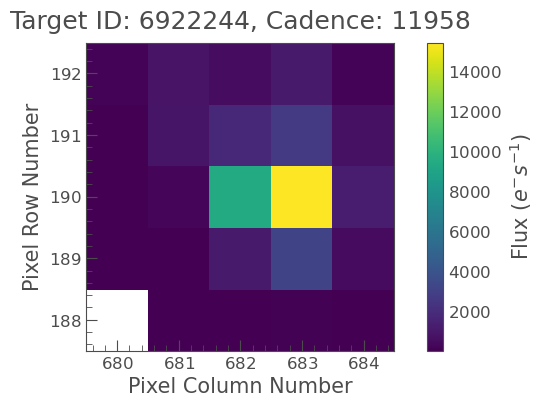

In [3]:
pixelFile = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()
# Show a single snapshot
pixelFile.plot(frame=42)


In [28]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

product_group_id = '6922244'
url = 'https://mast.stsci.edu/api/v0.1/Download/bundle.zip?previews=false&obsid=' + product_group_id
destination = 'C:\\Users\\hp\\Documents\\spaceFiles\\TESS\\'


download_and_unzip(url, destination)

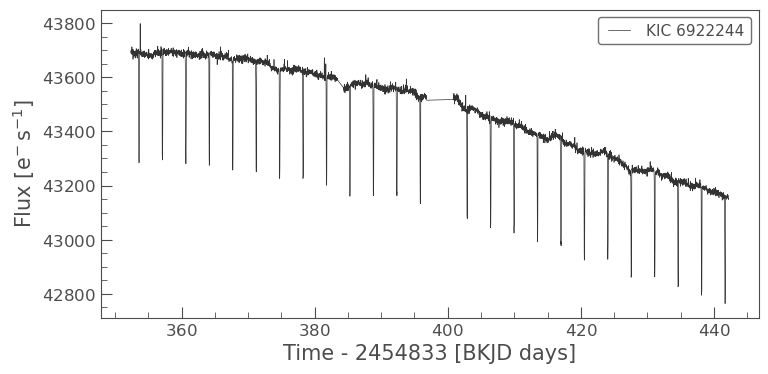

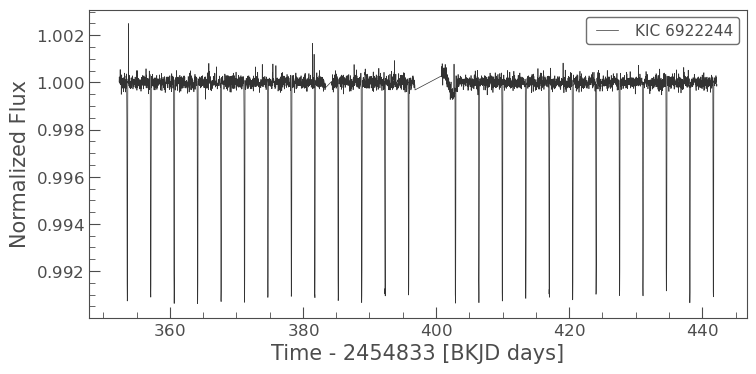

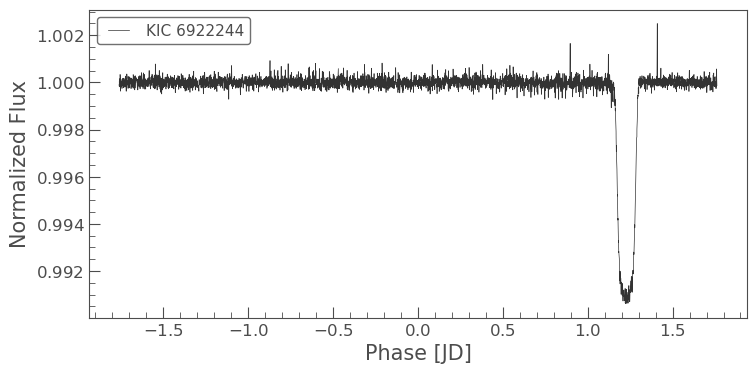

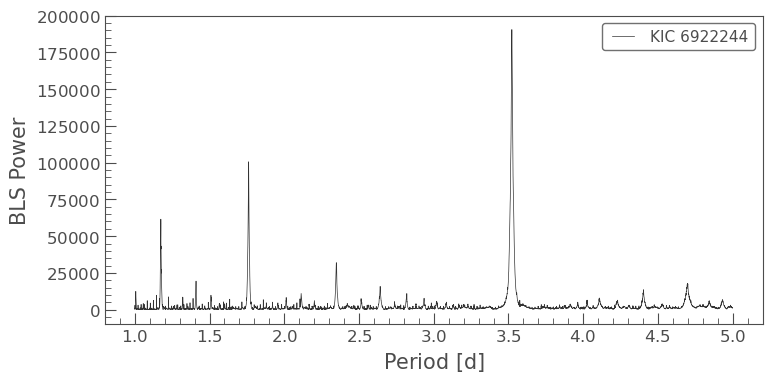

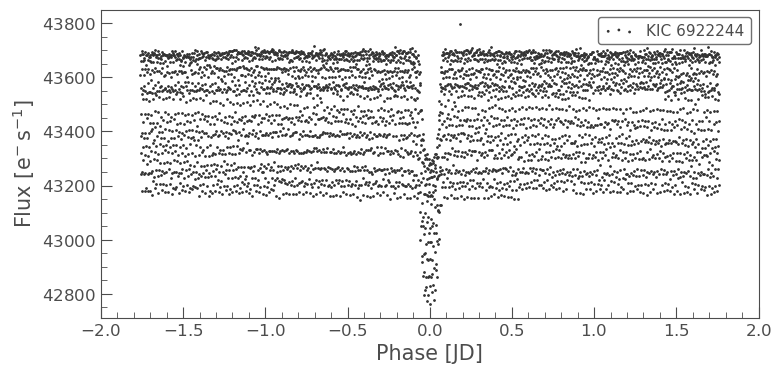

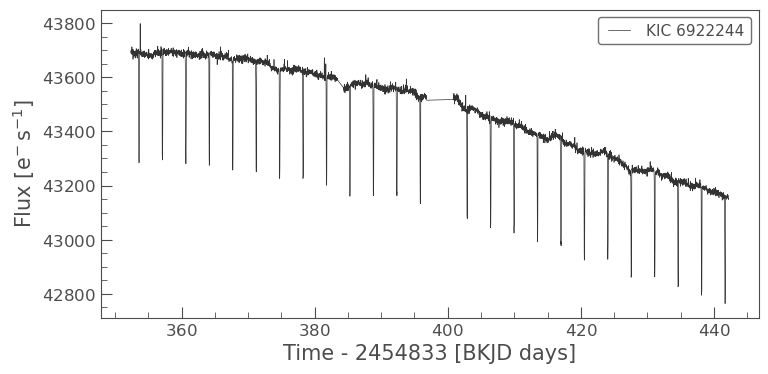

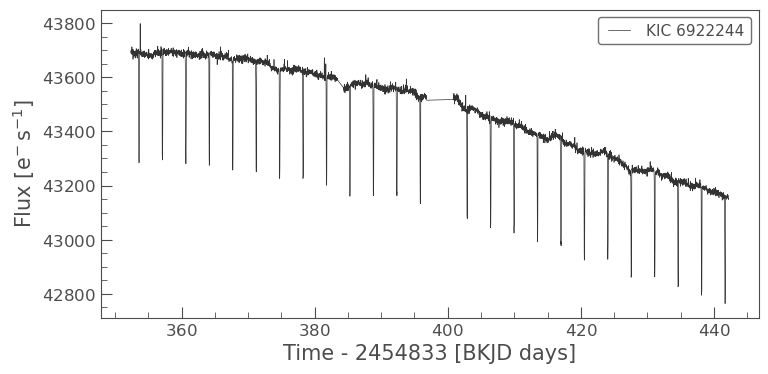

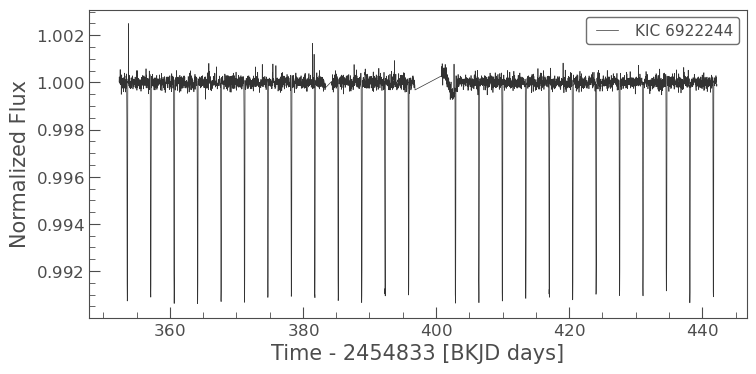

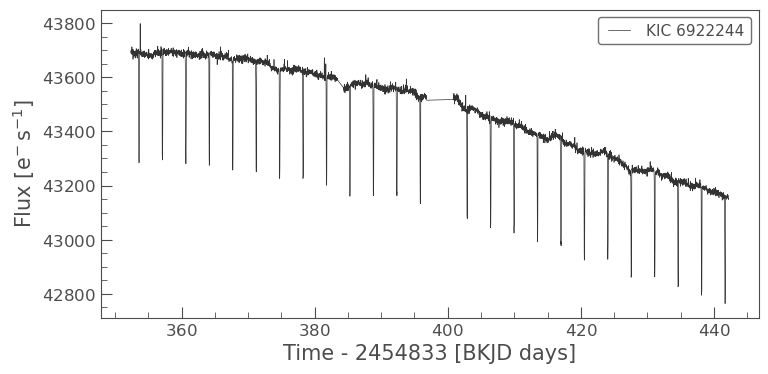

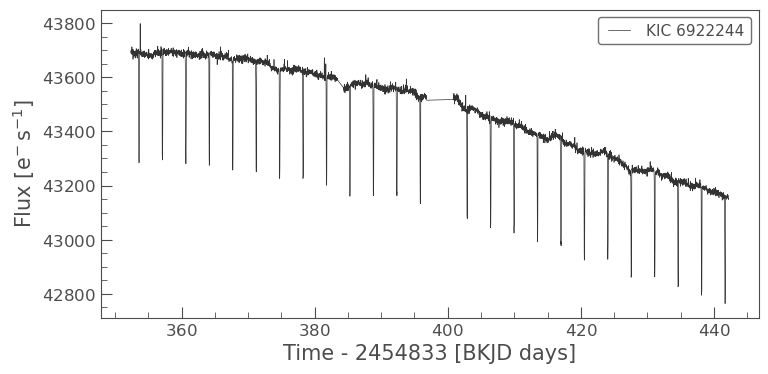

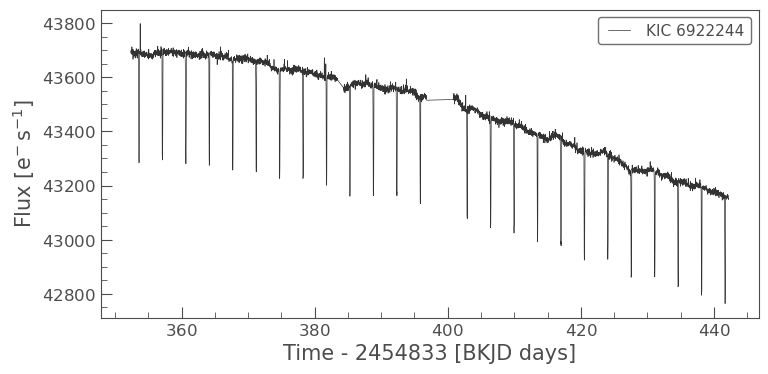

In [13]:
import matplotlib.pyplot as plt
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)
lc.plot()
plt.show()


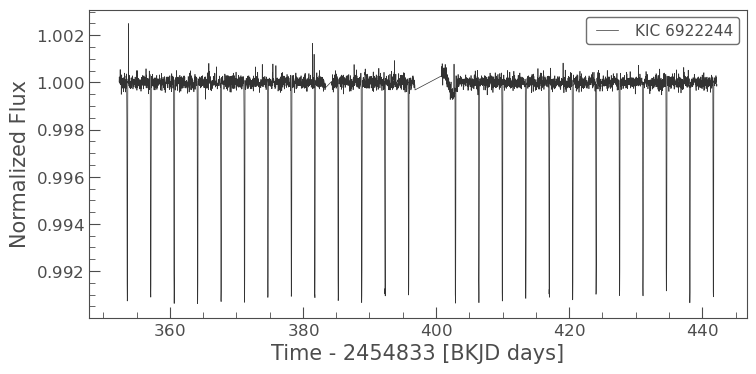

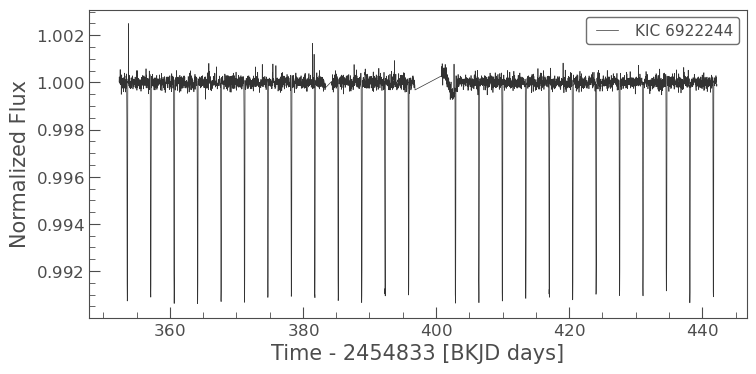

In [15]:
flat_lc = lc.flatten()
flat_lc.plot()
plt.show()

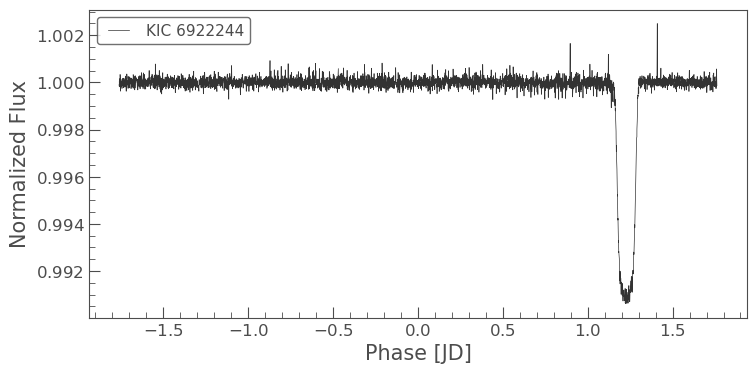

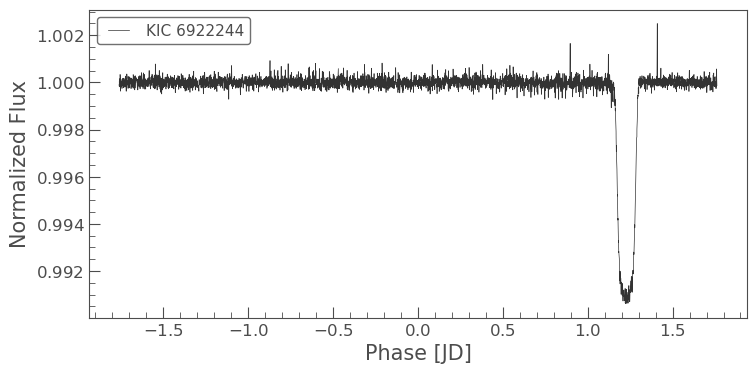

In [17]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot()
plt.show()

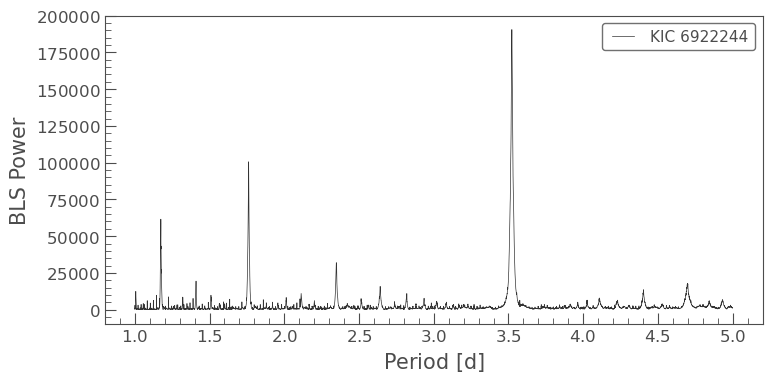

In [18]:
period = np.linspace(1, 5, 10000)
# BLS = Box Least Squares
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot() 
plt.show()

In [19]:
planet_x_period = bls.period_at_max_power

planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power

# Folding can yield a lot of information about the planet
# The depth can tell you about the size, etc
ax = lc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-2,2)

print(planet_x_period)
print(planet_x_t0)
print(planet_x_dur)


3.522652265226523 d
353.60132485035285
0.1 d


In [20]:
#importing a dataset for this which containes the spectral data and chemmical composition 
#source is nasa exoplanets archive site "https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html"

In [78]:
import pandas as pd

# Specify the file path
file_path = 'C:\\Users\\hp\\Documents\\spaceFiles\\datasets\\CTLv8.csv'

# Read the CSV file into a DataFrame
df1 = pd.read_csv(file_path)

# Display the DataFrame
print(df)


             Teff       rad  Wavelength (nm)  Frequency (THz)      H     He  \
2     3038.000000  0.170477            475.0            407.0   0.15   0.01   
3     3206.000000  0.315227            808.0            799.0  95.00   3.00   
4     3451.000000  0.382349            492.0            847.0  90.00  10.00   
5     3357.000000  0.224276            474.0            390.0  96.00   3.00   
6     3368.000000  0.366330            301.0            870.0  83.00  15.00   
...           ...       ...              ...              ...    ...    ...   
1540  4608.350526  0.530587            666.0            893.0  70.00  27.00   
1541  4609.274048  0.530758            785.0            367.0  71.00  26.00   
1542  4610.197569  0.530928            654.0            400.0  70.00  27.00   
1543  4611.121090  0.531099            764.0            459.0  71.00  26.00   
1544  4612.044612  0.531269            819.0            328.0  70.00  27.00   

          O     N    Fe  Water        C  
2     46.

In [79]:
import numpy as np
df = df1.iloc[1:1545,0:]
# df = df.apply(lambda x: x.fillna(x.mean()), axis=0)
nan_positions = df.isnull()
print("Positions of NaN values:\n", nan_positions)

Positions of NaN values:
        Teff    rad  Wavelength (nm)  Frequency (THz)      H     He      O  \
1     False  False            False            False  False  False  False   
2     False  False            False            False  False  False  False   
3     False  False            False            False  False  False  False   
4     False  False            False            False  False  False  False   
5     False  False            False            False  False  False  False   
...     ...    ...              ...              ...    ...    ...    ...   
1540  False  False            False            False  False  False  False   
1541  False  False            False            False  False  False  False   
1542  False  False            False            False  False  False  False   
1543  False  False            False            False  False  False  False   
1544  False  False            False            False  False  False  False   

          N     Fe  Water      C  
1     False  F

In [80]:
len(df)

1544

In [81]:
train_size = 0.8
len(df)*train_size

1235.2

In [82]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
features = df[['Wavelength (nm)', 'Frequency (THz)','Teff','rad','H','He','O','N','Fe','Water']]
target = df['C']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Target:\n", y_train)
print("Testing Target:\n", y_test)

Training Features:
       Wavelength (nm)  Frequency (THz)         Teff       rad     H    He  \
482             812.0            493.0  3636.805990  0.351143  70.0  27.0   
530             644.0            838.0  3681.135018  0.359330  70.0  27.0   
1189            433.0            314.0  4287.888593  0.471398  71.0  26.0   
860             719.0            504.0  3985.897087  0.415620  70.0  27.0   
1141            459.0            502.0  4244.483086  0.463381  71.0  26.0   
...               ...              ...          ...       ...   ...   ...   
1131            627.0            517.0  4235.247871  0.461675  71.0  26.0   
1295            528.0            286.0  4384.858342  0.489308  71.0  26.0   
861             862.0            310.0  3986.820609  0.415791  71.0  26.0   
1460            335.0            236.0  4535.392334  0.517112  70.0  27.0   
1127            854.0            419.0  4231.553786  0.460993  71.0  26.0   

        O    N   Fe  Water  
482   1.7  0.3  0.3    0.4

In [85]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
RFGModel = RandomForestRegressor()
from sklearn.svm import SVR
SVRModel = SVR()
from sklearn.ensemble import GradientBoostingRegressor
GBRModel = GradientBoostingRegressor()
from keras.models import Sequential
from keras.layers import Dense
KModel = Sequential()
KModel.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
KModel.add(Dense(32, activation='relu'))
KModel.add(Dense(1, activation='linear'))
KModel.compile(optimizer='adam', loss='mean_squared_error')
from sklearn.neighbors import KNeighborsRegressor
KNRModel = KNeighborsRegressor()
from sklearn.cross_decomposition import PLSRegression
PLSRModel = PLSRegression()



C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
LRModel.fit(X_train,y_train)
y_pred1=LRModel.predict(X_test)


In [89]:
RFGModel.fit(X_train,y_train)
y_pred1=RFGModel.predict(X_test)


In [107]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [102]:
SVRModel.fit(X_train,y_train)
y_pred1=SVRModel.predict(X_test)
mae = mean_absolute_error(y_test,y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test,y_pred1)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test,y_pred1)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.0024187702265372167
Mean Squared Error (MSE): 7.801553398058251e-06
Root Mean Squared Error (RMSE): 0.0027931260977725747
R-squared (R²): -0.011645341130176234


In [103]:
GBRModel.fit(X_train,y_train)
y_pred1=GBRModel.predict(X_test)
mae = mean_absolute_error(y_test,y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test,y_pred1)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test,y_pred1)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.0024590243033579436
Mean Squared Error (MSE): 8.229528296142539e-06
Root Mean Squared Error (RMSE): 0.0028687154435639898
R-squared (R²): -0.06714182877523833


In [104]:
KModel.fit(X_train,y_train)
y_pred1=KModel.predict(X_test)
mae = mean_absolute_error(y_test,y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test,y_pred1)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test,y_pred1)
print(f"R-squared (R²): {r2}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.3289 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
Mean Absolute Error (MAE): 2.330675020434565
Mean Squared Error (MSE): 9.560625558176367
Root Mean Squared Error (RMSE): 3.092026125079859
R-squared (R²): -1239747.2668806051


In [105]:
KNRModel.fit(X_train,y_train)
y_pred1=KNRModel.predict(X_test)
mae = mean_absolute_error(y_test,y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test,y_pred1)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test,y_pred1)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.002594757281553398
Mean Squared Error (MSE): 9.348925566343042e-06
Root Mean Squared Error (RMSE): 0.003057601276547196
R-squared (R²): -0.21229664288623717


In [106]:
PLSRModel.fit(X_train,y_train)
y_pred1=PLSRModel.predict(X_test)
mae = mean_absolute_error(y_test,y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test,y_pred1)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test,y_pred1)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.0024303751748123753
Mean Squared Error (MSE): 7.85530615953521e-06
Root Mean Squared Error (RMSE): 0.002802731910036208
R-squared (R²): -0.018615585124735157


In [109]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = target_scaler.transform(y_test.values.reshape(-1, 1))

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(X_test)
predictions_original_scale = target_scaler.inverse_transform(predictions)
print("Predictions on original scale:\n", predictions_original_scale)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0508 - val_loss: 0.9422
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9585 - val_loss: 0.9470
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0557 - val_loss: 0.9535
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9962 - val_loss: 0.9616
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9935 - val_loss: 0.9542
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9987 - val_loss: 0.9649
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0021 - val_loss: 0.9773
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9959 - val_loss: 0.9537
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9746 - val_loss: 0.9546
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9778 - val_loss: 0.9551
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9301 
Test Loss: 0.9551131129264832
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Predictions on original scale:
 [[0.00519257]


In [110]:
# Save the model as an .h5 file
model.save('model.h5')


In [111]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpmlzsz9uj\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpmlzsz9uj\assets


Saved artifact at 'C:\Users\hp\AppData\Local\Temp\tmpmlzsz9uj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1743333600208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1743333591376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1743333595216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1743333590416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1743333595408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1743333591184: TensorSpec(shape=(), dtype=tf.resource, name=None)
